

# Project:  An Analysis done on the effect the budget of a movie has on its performance in the Market.


# <a id='intro'></a>
## Introduction

### Dataset Description 

For this Analysis, I will like to first of all assume that I work for a movie production company and I have the board of directors at this company are undecided about whether they should go all out in thier spendings for upcoming movies or they should be prudent with resources.
Half of the board argue that resources are limited and advise that management will be better while the other half feels that spending more will also mean earning more. So as not to make the wrong decision, the company have decided to go with the option that is fact based. hence I have been provided with this Dataset which is the TMDB-MOVIES dataset from the Company to deduce whether the budget size of a movie has an effect on the performance of the movie.

This Dataset is a compilation of different movies from different genres with the following attributes:-
1. id: the id of each movie.
2. imdb id: the imdb id of each movie
3. popularity: a figure stating how much popular a movie is
4. budget: the budget size or mobey spent on each movie. which is in DOLLARS
5. revenue: the entire monies earned from each movie which is also in DOLLARS
6. original title: the title of each movie
7. cast: Starcast of each movie
8. homepage: the website to get more information on each movie
9. director: the director of each movie
10. tagline: a brief intro to the movie
11. overview: a brief summary of each movie
12. keywords: keywords of each movie
13. runtime: duration of each movie in minutes
14. genres: the genre of each movie
15. production_company: producers of each movie
16. release_date: exact date that each movie was released
17. release_year: exact year that each movie was released
18. vote_count: number of votes a movie received.
19. vote_average: average of the vote_count.
20. budget_adj: an adjusted version of the budget
21. revenue_adj: an adjusted version of the revenue



### Question(s) for Analysis
The general question I will be aiming to answer, is the effect of the budget on the general performance of a movie. to do this, i will be answering the following sub questions
1. how does the budget do against the popularity
2. how does the budget do against the revenue
3. how does the budget do against the number of votes received.
even though at a first glance it seems as though the budget is the independent variable while the popularity, revenue and number of votes are the dependent variables, since this is a report that affects the budget size of future movies, it won't be worng to see the budget as depended on the revenue, popularity and vote_counts.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0


## Data Wrangling

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')

Before i move forward to clean the data, i will be assessing the data to notice the irregularities and see what needs to be removed, modified or updated

In [4]:
#This gives us a sumarized view of the whole dataset. the top 5 cells including the headers to be specific.
print(df.head(5))

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

From the cell above, i can clearly see that there are columns that i wont be needing that i will have to remove later on

In [5]:
#next i check out some information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

this shows us the number of non empty columns, i can see that there are some columns that have empty values that will need to be attended to when cleaning commences.

In [6]:
# here i check for the shape of the dataset
df.shape

(10866, 21)

this dataset has 10866 movies with 21 attributes

In [7]:
#here i will look for a short description of the dataset
print (df.describe())

                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.8129

this shows me the counts of each column, the mean, minimum, maximum number also shows the 25%,50%,75% percentile of each column

In [8]:
# here i will look at the various datatypes of each column to see whether they are correctbb
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

I notice that some of the datatypes are not correct. these incorrect datatypes will be mentioned during the data cleaning process and corrected

In [9]:
# here i check for duplicates
sum(df.duplicated())

1

One row has duplicated data. this will be attended to during the data cleaning process.


### Data Cleaning
While assessing the dataset, some errors and inconsistencies were found. these errors were:
1. unnecesary data
2. empty cells
3. wrong data types
4. duplicates
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


### UNNECESARY ROWS
here i remove the rows that i wont be needing to do my analysis.
rows such as the 'id', 'imdb_id', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'overview', 'production_companies', 'release_date', 'release_year', 'budget_adj', 'revenue_adj', 'genres' and 'keywords' wont be needed for my anaylsis so they will be dropped.

In [11]:
df.drop(['id','imdb_id','original_title','cast','homepage','director','tagline','overview','production_companies','release_date','release_year','budget_adj','revenue_adj','genres','runtime','vote_average','keywords'],axis =1,inplace=True)

In [12]:
#to check if the code worked
print(df.head())

   popularity     budget     revenue  vote_count
0   32.985763  150000000  1513528810        5562
1   28.419936  150000000   378436354        6185
2   13.112507  110000000   295238201        2480
3   11.173104  200000000  2068178225        5292
4    9.335014  190000000  1506249360        2947


In [13]:
#here, i will have a quick look at a summary of my empty cells
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 4 columns):
popularity    10866 non-null float64
budget        10866 non-null int64
revenue       10866 non-null int64
vote_count    10866 non-null int64
dtypes: float64(1), int64(3)
memory usage: 339.6 KB


None of the needed cells have empty values.

None of the attributes also have incorrect datatypes.

Next i will deal with the duplicate data

In [14]:
# since i have just 1 duplicated data it will be better to drop it as it will not have a serious effect on my analysis.
df.drop_duplicates(inplace=True)

In [15]:
#check to confirm.
sum(df.duplicated())

0

I have already attended to the various inconsistencies highlithed with this data set and i will be moving next to begin my analysis

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### WHAT IS THE RELATIONSHIP BETWEEN THE BUDGET AND THE POPULARITY OF A MOVIE

BEFORE I FIND OUT THE RELATIONSHIP BETWEEN THE BUDGET AND THE POPULARITY OF A MOVIE,I WILL FIRST FILLUP THE EMPTY COLUMS THAT I JUST ADDED. I HAVE TO FIRST FIGURE OUT HOW TO CLASSIFY A MOVIE BETWEEN MOIES WITH LOW BUDGET THOSE WITH AVERAGE BUDGETS AND THOSE WITH HIGH BUDGETS

First i will look at a histogram of each column

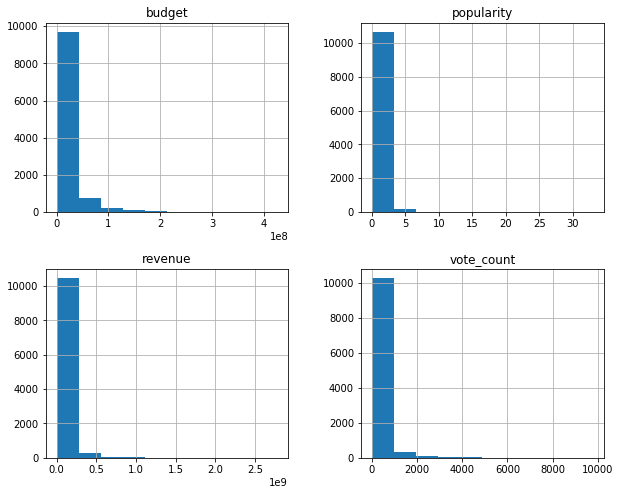

In [16]:
df.hist(figsize=(10,8));

Next, we will see the relationships between the Budget size of a movie, the vote_count of a movie to its popularity

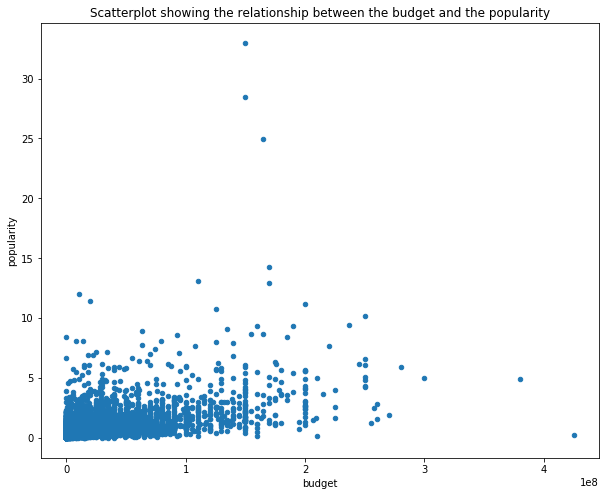

In [18]:
df.plot(x= 'budget', y= 'popularity',kind='scatter',figsize=(10,8));
plt.title('Scatterplot showing the relationship between the budget and the popularity')
plt.legend()

From this Scatter plot, I can see that there's no particular trend between the budget and the popularity

Next i will check for the relationship between the vote_counts and the popularity of a movie

Text(0.5,1,'relationship between the vote counts and the popularity of a movie')

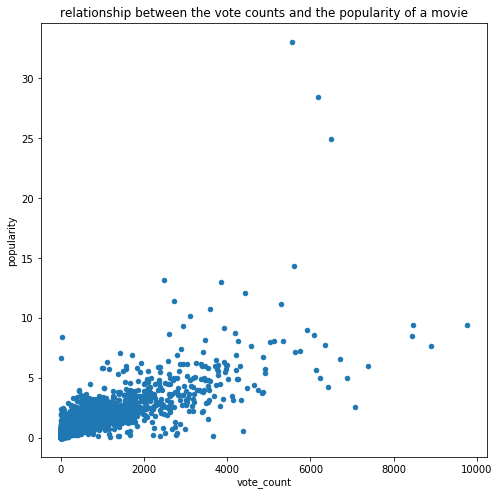

In [22]:
df.plot(x='vote_count',y='popularity', kind='scatter',figsize=(8,8));
plt.title('relationship between the vote counts and the popularity of a movie')

From this scatter plot, i notice there's a little trend between the vote_counts and the popularity of a movie. its an uptrend meaning, the more the vote_count, the more the popularity of a movie

In [23]:
df['profit']=pd.NaT
df['profit_rating']=pd.NaT
df['popularity_rating']=pd.NaT
df['vote_count_rating']=pd.NaT

In [24]:
#check for the added cells.
print(df.head())

   popularity     budget     revenue  vote_count profit profit_rating  \
0   32.985763  150000000  1513528810        5562    NaT           NaT   
1   28.419936  150000000   378436354        6185    NaT           NaT   
2   13.112507  110000000   295238201        2480    NaT           NaT   
3   11.173104  200000000  2068178225        5292    NaT           NaT   
4    9.335014  190000000  1506249360        2947    NaT           NaT   

  popularity_rating vote_count_rating  
0               NaT               NaT  
1               NaT               NaT  
2               NaT               NaT  
3               NaT               NaT  
4               NaT               NaT  


In [25]:
# find values for the profit column
def x(revenue,budget):
    return revenue-budget
df['profit']=df.apply(lambda f: x(f['revenue'],f['budget']),axis=1)
print(df)

       popularity     budget     revenue  vote_count      profit  \
0       32.985763  150000000  1513528810        5562  1363528810   
1       28.419936  150000000   378436354        6185   228436354   
2       13.112507  110000000   295238201        2480   185238201   
3       11.173104  200000000  2068178225        5292  1868178225   
4        9.335014  190000000  1506249360        2947  1316249360   
5        9.110700  135000000   532950503        3929   397950503   
6        8.654359  155000000   440603537        2598   285603537   
7        7.667400  108000000   595380321        4572   487380321   
8        7.404165   74000000  1156730962        2893  1082730962   
9        6.326804  175000000   853708609        3935   678708609   
10       6.200282  245000000   880674609        3254   635674609   
11       6.189369  176000003   183987723        1937     7987720   
12       6.118847   15000000    36869414        2854    21869414   
13       5.984995   88000000   243637091        

TO FILL UP THE PROFIT, POPULARITY AND VOTE_COUNT RATINGS COLUMNS, I WILL HAVE TO FIRST FIND THE MEANS OF THE PROFIT, POPULARITY AND VOTE_COUNT COLUMN'S MEAN OR AVERAGE.

In [26]:
# the mean of the popularity_column
popularity_mean= df['popularity'].mean()

In [27]:
# the mean of the profit_column
profit_mean=df['profit'].mean()

In [28]:
#the mean of the vote_count column
vote_count_mean=df['vote_count'].mean()

NEXT, I WILL BE CLASSIFYING EACH ROW UNDER THE FOLLOWING CLASSES
1. A MOVIE CAN ONLY BE CLASSIFIED AS 'PROFITABLE' OR 'LOSS FOR THE PROFIT_RATING_COLUMN
2. 'POPULAR' OR 'UNPOPULAR' FOR THE POPULARITY_RATING COLUMN
3. 'LOW_VOTED' OR 'HIGH_VOTED' FOR THE VOTE_COUNT RATING COLUMN
NEXT I WILL BE USING A FORMULA, THAT WILL SORT EACH ROW INTO EACH CLASS BY COMPARING WITH THE MEAN:

    IF THE PROFIT VALUE IS LESS THAN THE PROFIT_MEAN, IT SHOULD BE CLASSED AS A 'LOSS' GREATER THAN SHOULD BE A 'PROFIT'
    
    IF THE POPULARITY VALUE IS LESS THAN THE POPULARITY_MEAN, IT SHOULD READ 'UNPOPULAR' WHILE GREATER THAN SHOULD READ 'POPULAR'
    
    IF THE VOTE_COUNT VALUE IS LESS THAN THE VOTE_COUNT MEAN, IT SHOULD READ 'LOW_VOTED' IF ITS GREATER THAN THE MEAN, IT SHOULD READ 'HIGH_VOTED'.


In [29]:
#i will set the profit_ratings to show whether a movie was profitable or not.

df['profit_rating']=df['profit'].apply(lambda x: 'profitable' if x>profit_mean else 'loss')

In [30]:
#i will set the popularity_ratings to show whether a movie was popular or not.

df['popularity_rating']=df['popularity'].apply(lambda x: 'popular' if x>popularity_mean else 'unpopular')

In [31]:
#i will set the vote_count_ratings to show whether a movie received high_votes or not.

df['vote_count_rating']=df['vote_count'].apply(lambda x: 'high_voted' if x>vote_count_mean else 'low_voted')

In [32]:
#here i check to make sure my changes were made.

print(df.head())

   popularity     budget     revenue  vote_count      profit profit_rating  \
0   32.985763  150000000  1513528810        5562  1363528810    profitable   
1   28.419936  150000000   378436354        6185   228436354    profitable   
2   13.112507  110000000   295238201        2480   185238201    profitable   
3   11.173104  200000000  2068178225        5292  1868178225    profitable   
4    9.335014  190000000  1506249360        2947  1316249360    profitable   

  popularity_rating vote_count_rating  
0           popular        high_voted  
1           popular        high_voted  
2           popular        high_voted  
3           popular        high_voted  
4           popular        high_voted  


In [33]:
#Now i will get those movies whose budget are low
#first, i will find the mean of the budget column and then those under the mean are low_budget while those above are high budget movies
budget_mean = df['budget'].mean()
low_budget_movies=df[df["budget"]<=df["budget"].mean()]

In [34]:
#to have a look at the low_budget_movies table.
print(low_budget_movies.head())

    popularity    budget   revenue  vote_count    profit profit_rating  \
30    3.927333         0  29355203         425  29355203    profitable   
35    3.557846   6000000  35401758        1520  29401758    profitable   
36    3.358321         0  22354572         474  22354572          loss   
39    3.227329  11000000  62076141         754  51076141    profitable   
45    3.023253  10000000  14333790         396   4333790          loss   

   popularity_rating vote_count_rating  
30           popular        high_voted  
35           popular        high_voted  
36           popular        high_voted  
39           popular        high_voted  
45           popular        high_voted  


In [35]:
#Now i will get those movies whose budget are high
#first, i will find the mean of the budget column and then those under the mean are low_budget while those above are high budget movies

high_budget_movies=df[df["budget"]>=df["budget"].mean()]

In [36]:
#A look at the high_budget_movie table
print(high_budget_movies.head())

   popularity     budget     revenue  vote_count      profit profit_rating  \
0   32.985763  150000000  1513528810        5562  1363528810    profitable   
1   28.419936  150000000   378436354        6185   228436354    profitable   
2   13.112507  110000000   295238201        2480   185238201    profitable   
3   11.173104  200000000  2068178225        5292  1868178225    profitable   
4    9.335014  190000000  1506249360        2947  1316249360    profitable   

  popularity_rating vote_count_rating  
0           popular        high_voted  
1           popular        high_voted  
2           popular        high_voted  
3           popular        high_voted  
4           popular        high_voted  


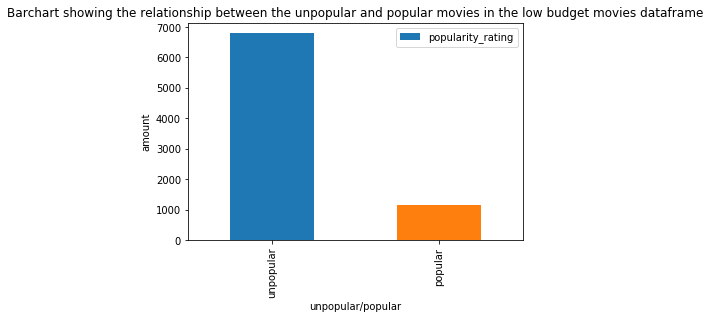

In [37]:
#plot a visual for the different popularity_ratings of low_budget_movies

low_budget_movies['popularity_rating'].value_counts().plot(kind='bar');
plt.title('Barchart showing the relationship between the unpopular and popular movies in the low budget movies dataframe')
plt.xlabel('unpopular/popular')
plt.ylabel('amount')
plt.legend()

From the chart above, we clearly see that alot of movies that were rated low_budget, were not so popular.
which means that a movie that didn't cost must, will mostly likely not be popular.
Next, I will check if low_budget_movies were profitable.

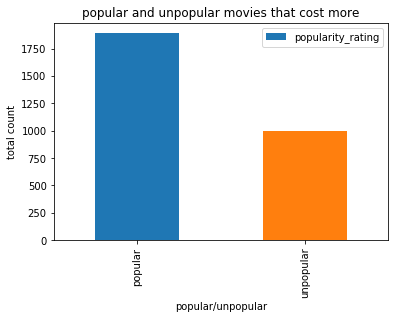

In [38]:
#plot a visual for the different popularity_ratings of high_budget_movies

high_budget_movies['popularity_rating'].value_counts().plot(kind='bar');
plt.title('popular and unpopular movies that cost more')
plt.xlabel('popular/unpopular')
plt.ylabel('total count')
plt.legend()

while for the high_budget_movies, Quite a good number to them were popular in comparison with those that were unpopular.

### Research Question (2): How does the budget affect the profit levels o the movies

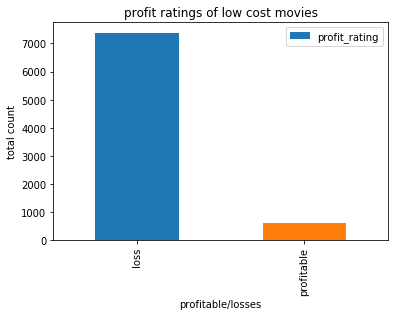

In [39]:
#plot a visual for the profit_rating of low_budget_movies

low_budget_movies['profit_rating'].value_counts().plot(kind='bar');
plt.title('profit ratings of low cost movies')
plt.xlabel('profitable/losses')
plt.ylabel('total count')
plt.legend()

Low_Budget_Movies also made alot of losses

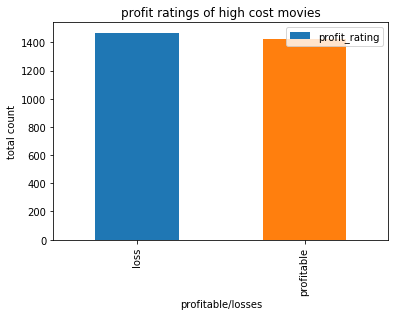

In [40]:
#plot a visual for the profit_rating of high_budget_movies

high_budget_movies['profit_rating'].value_counts().plot(kind='bar');
plt.title('profit ratings of high cost movies')
plt.xlabel('profitable/losses')
plt.ylabel('total count')
plt.legend()

While for the high_budget_movies, the difference wasn't that much.

### Research Question (3): How did the Vote_count do against the budget of a movie

I will also plot a barchart to show this.

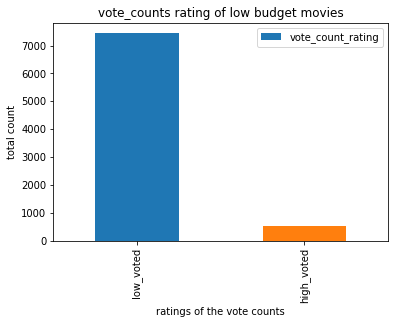

In [41]:
low_budget_movies['vote_count_rating'].value_counts().plot(kind='bar');
plt.title('vote_counts rating of low budget movies')
plt.xlabel('ratings of the vote counts')
plt.ylabel('total count')
plt.legend()

Alot of them also received low amount of votes.

For movies grouped as high_budget_movies.

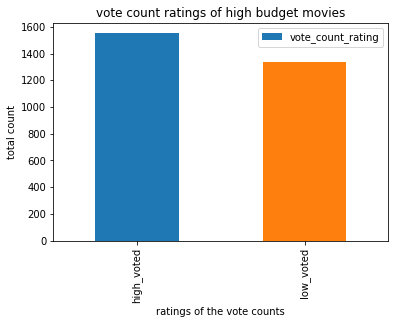

In [42]:
#to plot a visual for the vote_count_rating for high_budget_movies
high_budget_movies['vote_count_rating'].value_counts().plot(kind ='bar');
plt.title('vote count ratings of high budget movies')
plt.xlabel('ratings of the vote counts')
plt.ylabel('total count')
plt.legend()

For movies that cost alot, though alot of them, received high_rating, Alot also received low_voting

# Conclusions

From the Analysis conducted, i can confidently advise the board that spending more on movies will be the best thing to do.Yes, the profits and vote counts are not that great, but these are factors that can be easily improved by hiring world-class directors and actors as well as making use of state of the art equipments so that the movies come out as high-quality.

# Limitations
One major limitation was the fact that alot of the Budget rows had zeros which in real life is not really possible. replacing with the mean of the budget made all my Analysis the same which is why i used the original zeros as i was given.

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255